#                                                  Email Classification

<img src='email.png' align="left"/>
<img src='email3.jpg' align="right" padding-right="20px"/>

## Import Statements 

In [1]:
import pickle
import itertools
import numpy as np
from time import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn.metrics import confusion_matrix
%matplotlib inline

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def preprocess(words_file ,authors_file):
    """ 
        This function takes a pre-made list of email texts (by default word_data.pkl)
        and the corresponding authors (by default email_authors.pkl) and performs
        a number of preprocessing steps:
            -- splits into training/testing sets (10% testing)
            -- vectorizes into tfidf matrix
            -- selects/keeps most helpful features

        After this, the feaures and labels are put into numpy arrays, which play nice with sklearn functions

        4 objects are returned:
            -- training/testing features
            -- training/testing labels

    """
    ### the words (features) and authors (labels), already largely preprocessed
    words_file_handler = open(words_file, "rb")
    word_data = pickle.load(words_file_handler)
    words_file_handler.close()

    authors_file_handler = open(authors_file, "rb")
    authors = pickle.load(authors_file_handler)
    authors_file_handler.close()

    
    ### test_size is the percentage of events assigned to the test set
    ### (remainder go into training)
    features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(word_data, authors, test_size=0.1, random_state=42)



    ### text vectorization--go from strings to lists of numbers
    vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5,
                                 stop_words='english')
    features_train_transformed = vectorizer.fit_transform(features_train)
    features_test_transformed  = vectorizer.transform(features_test)



    ### feature selection, because text is super high dimensional and 
    ### can be really computationally chewy as a result
    selector = SelectPercentile(f_classif, percentile=1)
    selector.fit(features_train_transformed, labels_train)
    features_train_transformed = selector.transform(features_train_transformed).toarray()
    features_test_transformed  = selector.transform(features_test_transformed).toarray()

    ### info on the data
    print("no. of Chris training emails:", sum(labels_train))
    print("no. of Sara training emails:", len(labels_train)-sum(labels_train))
    
    return features_train_transformed, features_test_transformed, labels_train, labels_test

<p bgcolor=rgb(245,43,223)> features_train and features_test are the features for the training<br>
    and testing datasets, respectively<br>
    labels_train and labels_test are the corresponding item labels<br>
</p>

### Making Training and Testing Datasets

In [3]:
features_train, features_test, labels_train, labels_test = preprocess("word_data.pkl","email_authors.pkl")

no. of Chris training emails: 7936
no. of Sara training emails: 7884


## Creating Classifier

In [4]:
### Machine Learning Code ###
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
clf=RandomForestClassifier()
t0=time()
clf.fit(features_train,labels_train)
# Calculating Training Time
print("Training time:", round(time()-t0, 3), "s")
t0=time()
pred=clf.predict(features_test)
# Calculating Prediction Time
print("Prediction time:", round(time()-t0, 3), "s")
print("Accuracy:",round(accuracy_score(pred,labels_test),3)*100,"%")


Training time: 4.06 s
Prediction time: 0.029 s
Accuracy: 99.2 %


## Function to Draw confusion Matrix

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [6]:
# Making Classification Matrix
cnf_matrix = confusion_matrix(labels_test,pred)

Confusion matrix, without normalization
[[884   9]
 [  5 860]]
Normalized confusion matrix
[[ 0.98992161  0.01007839]
 [ 0.00578035  0.99421965]]


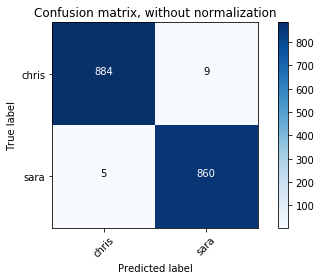

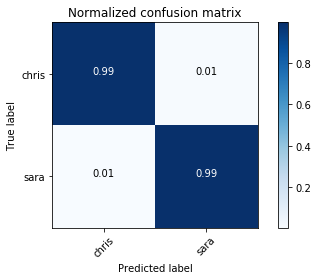

In [7]:
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['chris','sara'],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['chris','sara'], normalize=True,
                      title='Normalized confusion matrix')

plt.show()

<strong>Accuracy is pretty good</strong>

# Thank You